assignment03-pie.ipynb  
Author: Niamh Hogan

# Pie Chart of Email Domains  

This notebook contains a program that creates a pie chart of 1000 people's email domains taken from the csv file at the url:  
https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

<b>Step 1: Importing libraries</b>

I imported *pandas* for handling data and *matplotlib.pyplot* for creating the pie chart.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt 

<b>Step 2: Loading CSV file</b>

I used pd.read_csv() to load the dataset directly from the Google Drive download link ([GeeksforGeeks](https://www.geeksforgeeks.org/python/different-ways-to-import-csv-file-in-pandas/)).

In [2]:
url = (
    "https://drive.google.com/uc?"
    "id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
)

df = pd.read_csv(url)

<b>Step 3: Accessing the Email column & Testing Output</b>

I assigned *emails=df["Email"]* so I could isolate the email addresses and inspect them separately before processing them. This step let me confirm that the column loaded correctly. I then printed the emails Series to visually check that the email data was in the expected format and contained no unexpected issues.

In [3]:
emails=df["Email"]
print(emails)


0                pwarner@example.org
1      fergusonkatherine@example.net
2                fhoward@example.org
3              zjohnston@example.com
4                   elin@example.net
                   ...              
995           lyonsdaisy@example.net
996          dariusbryan@example.com
997           georgechan@example.org
998              wanda04@example.net
999          deannablack@example.org
Name: Email, Length: 1000, dtype: object


<b>Step 4: Converting Email to string</b>  

The Email column was already dtype object, so converting it to string wasn’t strictly necessary. However, I still used *astype(str)*, [GeeksforGeeks](https://www.geeksforgeeks.org/pandas/how-to-convert-pandas-columns-to-string/), to guarantee the values were treated consistently as text and to avoid any issues with unexpected or mixed data types. This ensured that splitting the domain part would work reliably.

In [4]:
df['Email'] = df['Email'].astype(str)

<b>Step 5: Extracting email domains</b>  

I used *str.split("@")*, [pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html), and selected the second element to isolate the domain for each email.

In [5]:
domain = df['Email'].str.split('@').str[1]

<b>Step 6: Counting Domain Frequencies</b>  

I generated a frequency count of each domain using *value_counts()*, ([pandas Official Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)), which provided the numeric values needed to create the pie chart ([Stack Exchange](https://datascience.stackexchange.com/questions/113826/how-to-plot-categorical-variables-with-a-pie-chart)).

In [6]:
count_domains = domain.value_counts()
print(count_domains)


Email
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


<b>Step 7: Creating Pie Chart</b>  

- I used *fig, ax = plt.subplots()* to create a figure and axes object ([Official Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)).   

- I created the pie chart with *ax.pie()*, adding labels, percentages (autopct), a start angle, shadow, and custom colors to make the chart clearer and more visually appealing ([Official Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html)).  

- I used *explode=[0.05] * len(count_domains)* to generate an explode value for each slice ([Python Official Documentation](https://docs.python.org/3/tutorial/introduction.html#lists)). [The Matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pie.html) states that the explode list must contain one value per wedge, and using list multiplication ensures the code works even if the number of domains changes.  

- Lastly, to increase the charts readability & visual appeal, I used [Matplotlib Official Documentation](https://matplotlib.org/stable/users/explain/text/text_props.html) to add a descriptive title, change font to bold and increase font size.

Text(0.5, 1.0, 'Proportion of Users by Email Domain')

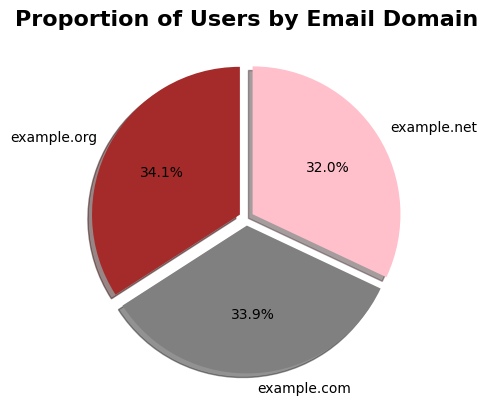

In [7]:
fig, ax = plt.subplots()

ax.pie(
    count_domains,
    labels=count_domains.index,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
    explode=[0.05] * len(count_domains),
    colors=["brown", "grey", "pink"]
)

plt.title(
    "Proportion of Users by Email Domain",
    fontsize=16,
    fontweight="bold",
    fontname="DejaVu Sans" 
)

# End